LATER Tutorial Plot Example Data

Using ChatGPT to translate the Matlab to Python Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

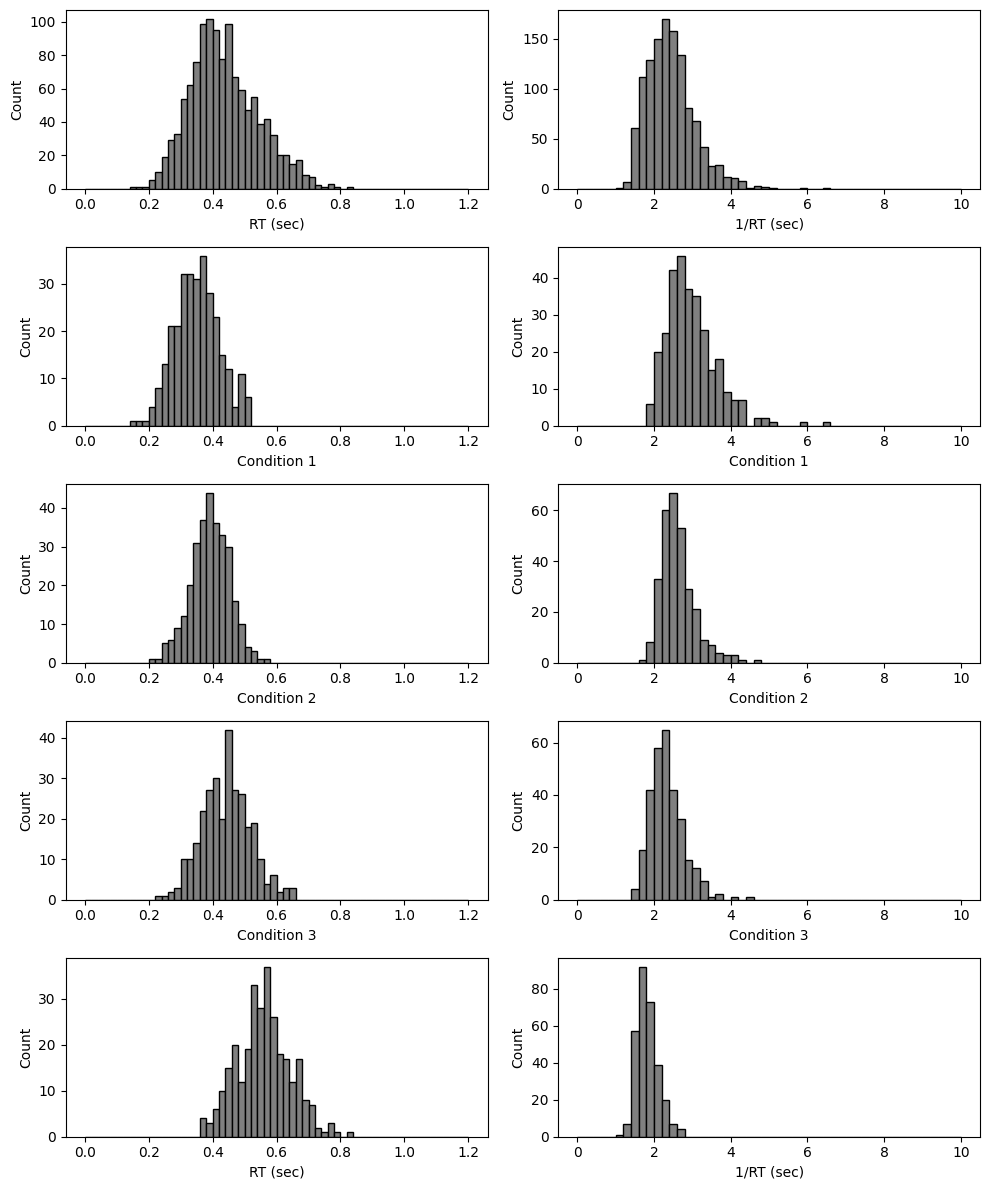

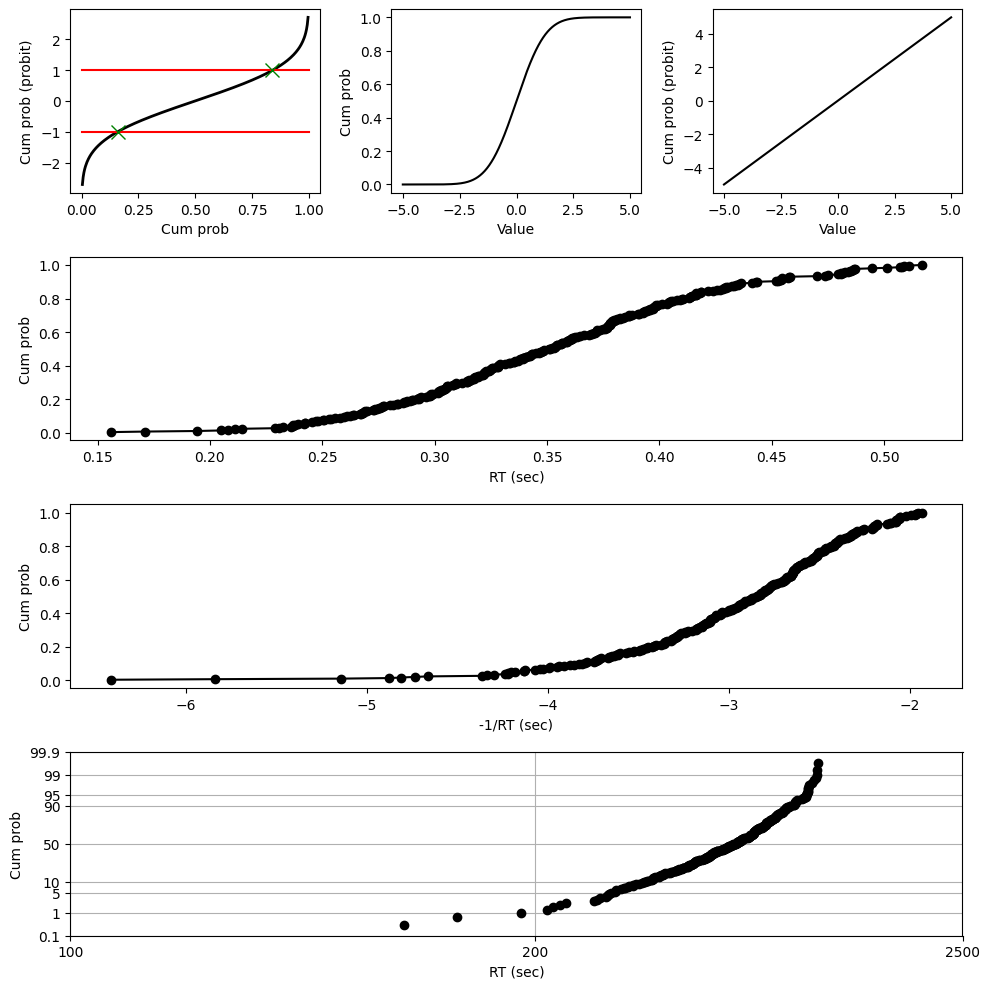

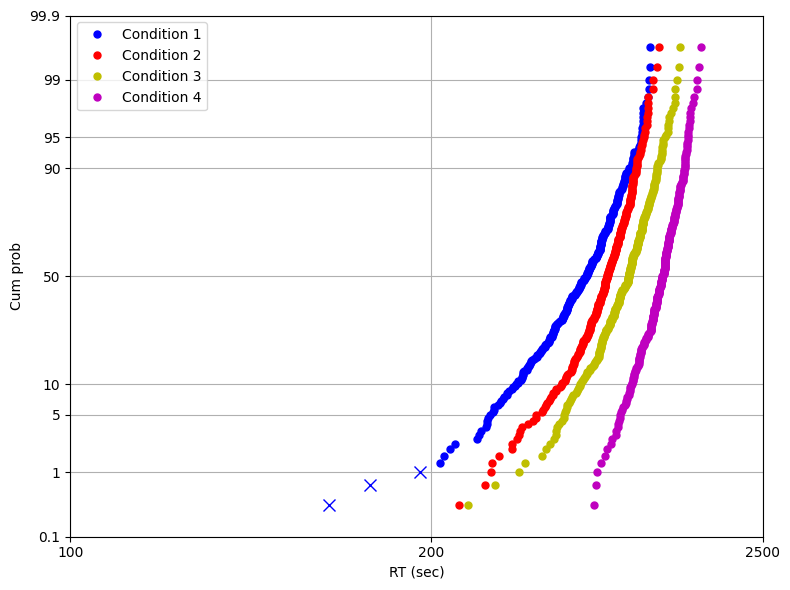

In [3]:
# laterTutorial_plotExampleData.py
#
# Python 3 version of the MATLAB LATER tutorial script
# Author: Adapted from Joshua I. Gold (UPenn)
# Converted by ChatGPT (2025)
#
# Demonstrates plotting of reaction time (RT) data and reciprobit plots
# according to the LATER model: RT = distance / rate, where rate ~ Gaussian.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# ---------------------------------------------------------------------
# Helper functions
# ---------------------------------------------------------------------

def later_getData():
    """
    Mimic the MATLAB later_getData() function.
    Replace with actual data loading.
    Here, we simulate four conditions with slightly different RT means.
    """
    np.random.seed(0)
    labels = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4']
    data = [
        np.random.normal(0.35, 0.07, 300),
        np.random.normal(0.40, 0.06, 300),
        np.random.normal(0.45, 0.08, 300),
        np.random.normal(0.55, 0.09, 300)
    ]
    # Clip to positive RTs
    data = [d[d > 0.1] for d in data]
    return data, labels


def later_plotHistogram(rt_data, bins, xlabel):
    """Plot histogram of RT or 1/RT data."""
    plt.hist(rt_data, bins=bins, color='gray', edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel('Count')


# ---------------------------------------------------------------------
# 1. Load the raw data
# ---------------------------------------------------------------------
data, labels = later_getData()

# ---------------------------------------------------------------------
# Plot RT distribution
# ---------------------------------------------------------------------
plt.figure(figsize=(10, 12))

rt_bins = np.arange(0, 1.2 + 0.02, 0.02)
rrt_bins = np.arange(0, 10.0 + 0.2, 0.2)

# TOP row: all trials combined
plt.subplot(5, 2, 1)
later_plotHistogram(np.concatenate(data), rt_bins, 'RT (sec)')

plt.subplot(5, 2, 2)
later_plotHistogram(1.0 / np.concatenate(data), rrt_bins, '1/RT (sec)')

# Loop through each condition
for ii, label in enumerate(labels):
    plt.subplot(5, 2, 3 + ii*2)
    later_plotHistogram(data[ii], rt_bins, label)
    plt.subplot(5, 2, 4 + ii*2)
    later_plotHistogram(1.0 / data[ii], rrt_bins, label)

plt.subplot(5, 2, 9)
plt.xlabel('RT (sec)')
plt.ylabel('Count')
plt.subplot(5, 2, 10)
plt.xlabel('1/RT (sec)')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Plot Reciprocity Example (step-by-step)
# ---------------------------------------------------------------------
plt.figure(figsize=(10, 10))

rts = np.sort(data[0])
n = len(rts)
cum_probs = np.arange(1, n + 1) / n
probit_cum_probs = norm.ppf(cum_probs, 0, 1)

# 1a. Conversion to probit scale
plt.subplot(4, 3, 1)
plt.plot(cum_probs, probit_cum_probs, 'k-', linewidth=2)
plt.plot([0, 1], [-1, -1], 'r-')
plt.plot([0, 1], [1, 1], 'r-')
plt.plot([0.5 - 0.34, 0.5 + 0.34], [-1, 1], 'gx', markersize=10)
plt.xlabel('Cum prob')
plt.ylabel('Cum prob (probit)')

# 1b. Ideal cumulative Gaussian (probability scale)
x = np.arange(-5, 5, 0.01)
plt.subplot(4, 3, 2)
plt.plot(x, norm.cdf(x, 0, 1), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob')

# 1c. Ideal cumulative Gaussian (probit scale)
plt.subplot(4, 3, 3)
plt.plot(x, norm.ppf(norm.cdf(x, 0, 1), 0, 1), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob (probit)')

# 2. Empirical cumulative RT distribution
plt.subplot(4, 1, 2)
plt.plot(rts, cum_probs, 'ko-')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

# 3. Empirical cumulative -1/RT distribution
plt.subplot(4, 1, 3)
plt.plot(-1.0 / rts, cum_probs, 'ko-')
plt.xlabel('-1/RT (sec)')
plt.ylabel('Cum prob')

# 4. Empirical cumulative -1/RT distribution (probit scale)
plt.subplot(4, 1, 4)
plt.plot(-1.0 / rts, probit_cum_probs, 'ko')
plt.grid(True)

# Axis formatting
express_cutoff = 200
XTickLabels = [100, express_cutoff, 2500]
XTickValues = -1000.0 / np.array(XTickLabels)
YTickLabels = [0.1, 1, 5, 10, 50, 90, 95, 99, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100.0, 0, 1)

plt.yticks(YTickValues, YTickLabels)
plt.xticks(XTickValues, XTickLabels)
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Final Reciprobit Plot (all data sets)
# ---------------------------------------------------------------------
plt.figure(figsize=(8, 6))
plt.grid(True)
colors = ['b', 'r', 'y', 'm']

express_cutoff = 0.2
plot_handles = []

for ii, label in enumerate(labels):
    rts_sorted = np.sort(data[ii])
    n = len(rts_sorted)
    cum_probs = np.arange(1, n + 1) / n
    probit_cum_probs = norm.ppf(cum_probs, 0, 1)

    Lexpress = rts_sorted < express_cutoff
    plt.plot(-1.0 / rts_sorted[Lexpress], probit_cum_probs[Lexpress],
             'x', color=colors[ii], markersize=8)
    h, = plt.plot(-1.0 / rts_sorted[~Lexpress], probit_cum_probs[~Lexpress],
                  'o', color=colors[ii], markerfacecolor=colors[ii], markersize=5)
    plot_handles.append(h)

plt.yticks(YTickValues, YTickLabels)
plt.xticks(XTickValues, XTickLabels)
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.legend(plot_handles, labels, loc='upper left')

plt.tight_layout()
plt.show()


LATER Tutorial Dependence On Model Parameters

In [5]:
import numpy, scipy, matplotlib
print("✅ All packages loaded successfully!")

✅ All packages loaded successfully!
